In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
# 리뷰 출력시 ... 없이 전부 나오게 설정
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)

In [3]:
data_kurly = pd.read_csv(r"C:\Users\NT550\asac\SIH\SIH\eat_the\data_kurly_sentiment.csv", index_col=0)
data_kurly.head()

,ProductCode,MemberGrade,MemberName,ProductName,ReviewText,ReviewDate,ReviewLike,pred_label,pred_score
0,1000098225,일반,송**,[아우름] 바다를 품은 톳 해물솥밥키트,간단한 한끼대용으로 좋네요,2023.07.12,0,1,0.970708
1,1000098225,일반,봉**,[아우름] 바다를 품은 문어솥밥키트,맛있어서 재구매했어요!,2023.07.12,0,1,0.978758
2,1000098225,화이트,최**,[아우름] 바다를 품은 톳 해물솥밥키트,아침대용으로 간단하고좋아요,2023.07.11,0,1,0.949967
3,1000098225,라벤더,곽**,[아우름] 바다를 품은 톳 해물솥밥키트,톳좋아해서 주문했어요.,2023.07.11,0,1,0.981879
4,1000098225,화이트,김**,[아우름] 바다를 품은 톳 해물솥밥키트,지난 번에 간편하면서도 맛있게 먹어서 또 주문 했습니다.,2023.07.11,0,1,0.993944


In [4]:
data_dir = r'C:\Users\NT550\asac\SIH\SIH\eat_the\키워드 정제'
data_list = os.listdir(data_dir)

In [5]:
data_list[1]

'건강가득 전복솥밥 키트 부정_빈도수.xlsx'

In [6]:
def table_view(n):
    df = pd.read_excel(data_dir+'/'+data_list[n], index_col=0).dropna()
    print(data_list[n])
    print(df)

In [7]:
def kw_in_product(product_name, keyword):
    return data_kurly[(data_kurly['ProductName'] == product_name)&(data_kurly['ReviewText'].apply(lambda x:keyword in x))]['ReviewText']

In [8]:
data_kurly['ProductName'].unique()

array(['[아우름] 바다를 품은 톳 해물솥밥키트', '[아우름] 바다를 품은 문어솥밥키트',
       '[치즈룸x테이스팅룸] 전복 솥밥 리조또', '[콜린스 다이닝] 건강가득 전복솥밥 키트',
       '[콜린스 다이닝] 한돈 가지 솥밥 키트', '[수린] 한우 사골 솥밥 밀키트 (2인분)',
       '[온하루] 구운 삼치 솥밥키트', '[온하루] 구운 생선 솥밥키트', '[콜린스 다이닝] 도미 솥밥 키트',
       '[콜린스 다이닝] 미나리 소고기 솥밥 키트', '[온하루] 한돈 건나물 솥밥키트'], dtype=object)

In [9]:
table_view(2)

도미 솥밥 키트 긍정_빈도수.xlsx
    Top Nouns  빈도수  Correlation
4     도미/Noun  353     0.095858
20    키트/Noun  141     0.282040
30    후기/Noun  100     0.168504
49    추가/Noun   73     0.237449
80     집/Noun   55     0.127519
93    추천/Noun   47     0.116098
108  양념장/Noun   43     0.079699
123    김/Noun   38     0.070735
130  콜린스/Noun   36     0.160419
137    밀/Noun   35     0.079314
147   냄비/Noun   32     0.081438
165   걱정/Noun   29     0.137784
170   달래/Noun   28     0.097461
185   컬리/Noun   25     0.088629
189   가족/Noun   25     0.080498
188   뚝딱/Noun   25     0.127574
191    양/Noun   24     0.085618
245   손질/Noun   19     0.063726
248  다이닝/Noun   18     0.075837
251  누룽지/Noun   18     0.057390
250   조절/Noun   18     0.090107
285  감칠맛/Noun   16     0.057880
311   죽순/Noun   14     0.060815
329   건강/Noun   14     0.067449
321   저녁/Noun   14     0.066450
342   별미/Noun   13     0.085155
344   오늘/Noun   13     0.109284
387   무쇠/Noun   11     0.057117
392   강추/Noun   11     0.071275
463   아들/Noun    9 

In [10]:
kw_in_product(data_kurly['ProductName'].unique()[10], '추가')

12262                           완전 괜찮아요 :) 가지 별도로 구워서 추가
12270                       콩나물 추가해서 먹었어요 가볍게 한번쯤 먹어볼만해요
12282    콩나물 추가해서 먹었는데 괜찮아요. 세일하면 사먹고 원가격이라면 비싸서 안살것 같아요
Name: ReviewText, dtype: object

In [32]:
len(kw_in_product(data_kurly['ProductName'], '간편'))

1296

In [39]:
# 구성원 라벨링

who_dad =['아빠','아버지','아부지'] # 0
who_mam = ['엄마','어머니']         # 1
who_husband = ['남편','오빠', '남의편','아저씨'] # 2
who_guest = ['손님','직장','친구','남친'] # 3
who_kid = ['딸','아들','아이','애들','얘들'] # 4
who_baby = ['아기','애기'] # 5
who_fam = ['식구','가족'] # 6
who_parents = ['부모','엄빠'] # 7

In [40]:

data_kurly['person_label'] = data_kurly['ReviewText'].apply(lambda text: 
                                                        0 if any(word in text for word in who_dad) else
                                                        1 if any(word in text for word in who_mam) else
                                                        2 if any(word in text for word in who_husband) else
                                                        3 if any(word in text for word in who_guest) else
                                                        4 if any(word in text for word in who_kid) else
                                                        5 if any(word in text for word in who_baby) else
                                                        6 if any(word in text for word in who_fam) else
                                                        7 if any(word in text for word in who_parents) else np.nan)



In [41]:
# 목적 라벨링

invite = ['집들이', '초대', '접대', '파티', '해드', '파티', '크리스마스', '대접', '생일', '생신', '손님','모실때', '모시', '어르신', '어루신'] # 0
goodmeal = ['보신', '분위기', '고급', '건강', '보양', '도전', '기운', '기분','제대로','성공'] # 1
comfortable = ['귀찮','편하','급하','간단','밥하기','입맛없','입맛 없','밥맛없','밥맛 없','반찬없','반찬 없','바쁜','바쁠','바쁘'] # 2
gift = ['선물','드렸','보내','보냈'] # 3

In [42]:

data_kurly['perpose_label'] = data_kurly['ReviewText'].apply(lambda text: 
                                                        0 if any(word in text for word in invite) else
                                                        1 if any(word in text for word in goodmeal) else
                                                        2 if any(word in text for word in who_husband) else
                                                        3 if any(word in text for word in comfortable) else
                                                        4 if any(word in text for word in gift) else np.nan)

In [43]:
# data_kurly.to_csv('컬리_라벨링.csv')

In [44]:
df = pd.read_excel(r'C:\Users\NT550\asac\SIH\SIH\eat_the\kurly_label.xlsx')


In [ ]:
df[df['purpose_label'] == 5].head()

## 시각화

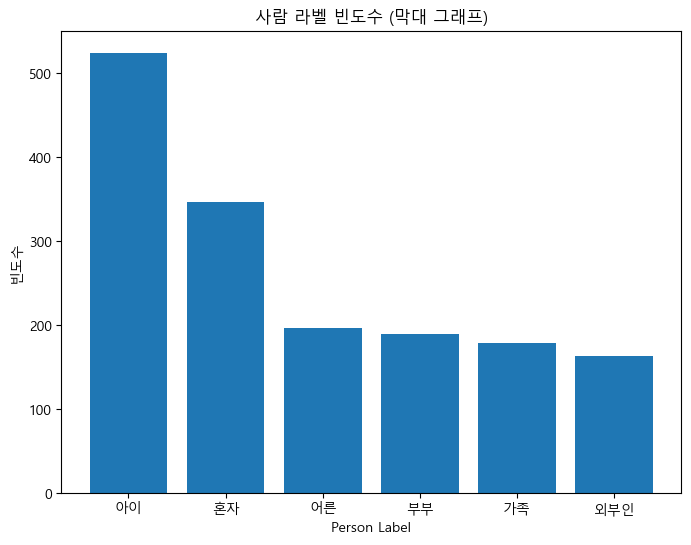

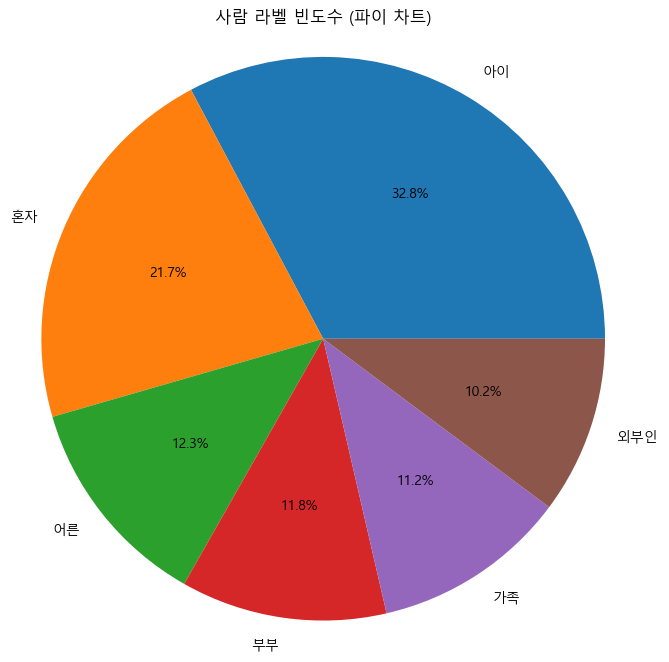

In [46]:
import matplotlib.pyplot as plt

# 'person_label' 컬럼에서 7을 제외한 데이터를 새로운 DataFrame으로 생성합니다.
data_kurly_filtered = df[df['person_label'] != 7]

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 라벨 매핑 딕셔너리
label_mapping = {
    1: '외부인',
    2: '어른',
    3: '아이',
    4: '부부',
    5: '가족',
    6: '혼자'
}

# 각 라벨의 빈도수를 계산합니다.
label_counts = data_kurly_filtered['person_label'].value_counts()

# 막대 그래프를 그립니다.
plt.figure(figsize=(8, 6))
plt.bar([label_mapping[label] for label in label_counts.index], label_counts.values)
plt.xlabel('Person Label')  # x축 라벨 설정
plt.ylabel('빈도수')  # y축 라벨 설정
plt.title('사람 라벨 빈도수 (막대 그래프)')  # 그래프 제목 설정
plt.show()

# 파이 차트를 그립니다.
plt.figure(figsize=(8, 8))
plt.pie(label_counts.values, labels=[label_mapping[label] for label in label_counts.index], autopct='%1.1f%%')
plt.title('사람 라벨 빈도수 (파이 차트)')  # 그래프 제목 설정
plt.axis('equal')  # 파이 차트가 원형으로 그려지도록 설정
plt.show()


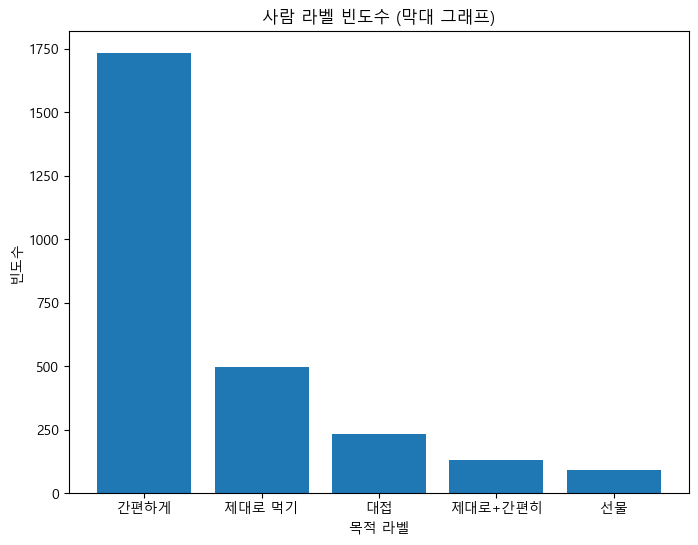

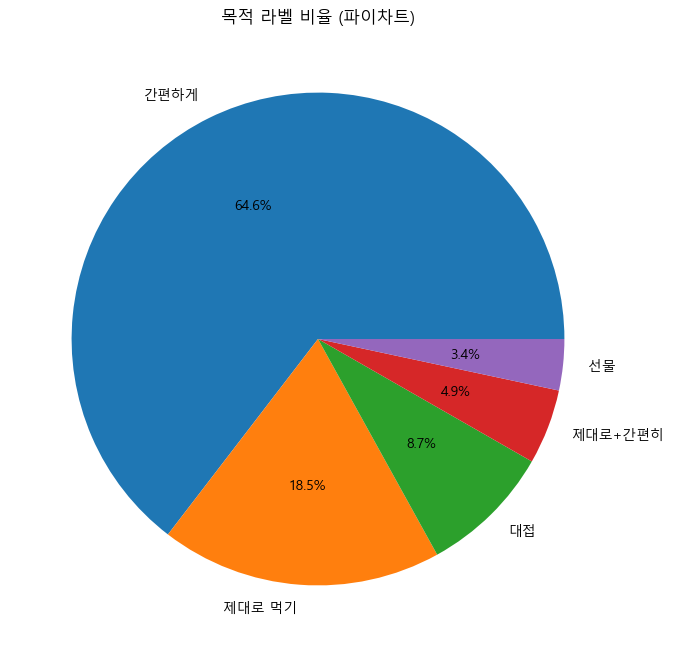

In [47]:


# 0값을 제외한 나머지 값의 빈도수 계산
filtered_data = df[df['purpose_label'] != 0]['purpose_label']
value_counts = filtered_data.value_counts()

# 라벨 매핑 딕셔너리
label_mapping = {
    1: '선물',
    2: '대접',
    3: '제대로 먹기',
    4: '간편하게',
    5: '제대로+간편히'
}

# 막대 그래프 그리기
plt.figure(figsize=(8, 6))
plt.bar([label_mapping[label] for label in value_counts.index], value_counts.values)
plt.xlabel('목적 라벨')  # x축 라벨 설정
plt.ylabel('빈도수')  # y축 라벨 설정
plt.title('사람 라벨 빈도수 (막대 그래프)')  # 그래프 제목 설정
plt.show()

# 파이 차트 그리기 (이 부분은 변경하지 않습니다)
plt.figure(figsize=(8, 8))
plt.pie(value_counts.values, labels=[label_mapping[label] for label in value_counts.index], autopct='%1.1f%%')
plt.title('목적 라벨 비율 (파이차트)')
plt.show()

In [48]:
""" 
1. 편하게 - 아이 4 -3
2. 편하게 - 혼자 4 - 6
3. 편하게 - 그 외 가족 4 -5
4. 초대 - 손님 2 - 1
5. 초대 - 어른 2 - 2
6. 초대 - 부부 2 - 4
7. 선물 - 어른 1 - 2
8. 선물 - 손님 1 - 1
9. 선물 - 그외가족 1 - 5 
10. 제대로 - 아이 3 - 3
11. 제대로 - 혼자 3 - 6
12. 제대로 - 어른 3 - 2
"""

df[(df['purpose_label'] == 3) & (df['person_label'] == 6)]['ReviewText']

197                                                                                                                                                                                                                                                                                                                                                                                   솥밥먹고싶어서 르쿠르제까지 구매했는데 제가 시간조절못한건지 설익어서 무지 아쉽네요 잘만 하면 맛있게 먹을 수 있을 거 같은데 재도전하긴 두렵네요
377                                                                                                                                                                                                                                                                                                                                                                                                                            솥밥 어렵 ㅠㅠ 담에 다시 도전할래요 제가 문제지 구성 자체는 알찼어요
1026                                                                                      

In [ ]:
data_kurly[data_kurly['ReviewText'].apply(lambda x:'의사' in x)]

In [50]:
# 리뷰 출력시 ... 없이 전부 나오게 설정
pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)

In [ ]:
import pandas as pd

naver_scaling = pd.read_excel(r'C:\Users\NT550\asac\SIH\SIH\eat_the\naver_blog_text_scaling_keyword_label_finish.xlsx')
naver_scaling.head()


In [52]:
""" pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None) """

" pd.set_option('display.max_rows', None)\npd.set_option('display.max_colwidth', None) "

In [55]:
nv_4 = naver_scaling[naver_scaling['purpose_labeling'] == 4]

In [61]:
def kw_in_text(product_name, keyword):
    return naver_scaling[(naver_scaling['주소'] == product_name)&(naver_scaling['변환된 내용'].apply(lambda x:keyword in x))]['변환된 내용']

In [64]:
# 편리성, 제대로 + 편리, 선물
kw_in_text(naver_scaling['주소'], '편하')

1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [15]:
naver_scaling.iloc[1]

주소        https://blog.naver.com/PostView.naver?blogId=w...
변환된 내용    육아하는 RN 널봄맘요리똥손인 제가 환절기를 앞두고 식구들 몸보신을 위해뭘 조리해볼...
토큰화       ['육아/Noun', '하다/Verb', 'RN/Alpha', '널봄맘/Noun',...
Name: 1, dtype: object

In [ ]:
naver_scaling['주소'][128:]

128            https://blog.naver.com/PostView.naver?blogId=bxrxx&logNo=223053491375&redirect=Dlog&widgetTypeCall=true&directAccess=false
129         https://blog.naver.com/PostView.naver?blogId=sy981126&logNo=223081190514&redirect=Dlog&widgetTypeCall=true&directAccess=false
130    https://blog.naver.com/PostView.naver?blogId=peakyblinders&logNo=223006568414&redirect=Dlog&widgetTypeCall=true&directAccess=false
131        https://blog.naver.com/PostView.naver?blogId=roqkf0202&logNo=222392897733&redirect=Dlog&widgetTypeCall=true&directAccess=false
132         https://blog.naver.com/PostView.naver?blogId=yeeeeees&logNo=222933223713&redirect=Dlog&widgetTypeCall=true&directAccess=false
133           https://blog.naver.com/PostView.naver?blogId=ryne_e&logNo=223056454967&redirect=Dlog&widgetTypeCall=true&directAccess=false
134          https://blog.naver.com/PostView.naver?blogId=zhouyin&logNo=222476290468&redirect=Dlog&widgetTypeCall=true&directAccess=false
135        https://blog.naver.com/

In [ ]:
# 편리성, 제대로 + 편리, 선물

pd.reset_option('display.max_rows')
pd.reset_option('display.max_colwidth')

naver_blog = pd.read_excel(r'C:\Users\NT550\asac\SIH\SIH\eat_the\naver_blog_text_scaling_keyword_label_finish.xlsx')
naver_blog.head()